In [1]:
# Import libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi
import datetime
import matplotlib.pyplot as plt
from MCForecastTools import MCSimulation


In [2]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

Python-dotenv could not parse statement starting at line 1


In [3]:
#PULL ALL DATA FROM ALPACA, SET INTO DATAFRAMES BASED ON ASSET TYPE

In [4]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [5]:
# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [6]:
# Set timeframes for day, year, 3 year, 5 year
timeframe = "1D"

today_date = str(datetime.datetime.now()).split()[0]
one_year_ago = str(datetime.datetime.now() - datetime.timedelta(days=1*365)).split()[0]
three_year_ago = str(datetime.datetime.now() - datetime.timedelta(days=3*365)).split()[0]
five_year_ago = str(datetime.datetime.now() - datetime.timedelta(days=5*365)).split()[0]
today_date, one_year_ago, three_year_ago, five_year_ago

('2021-02-21', '2020-02-22', '2018-02-22', '2016-02-23')

In [7]:
# Set start and end datetimes of 5 years from Today
start_date = pd.Timestamp(five_year_ago, tz="America/New_York").isoformat()
end_date = pd.Timestamp(today_date, tz="America/New_York").isoformat()
start_date, end_date

('2016-02-23T00:00:00-05:00', '2021-02-21T00:00:00-05:00')

In [8]:
#Set ticker for S&P Portfolio
spy_ticker = ['SPY']

In [9]:
# Get 5 year's worth of historical data for Green Auto Portfolio
spy_df = api.get_barset(
    spy_ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

spy_df

SPY                                      
                             open      high       low   close    volume
time                                                                   
2020-09-28 00:00:00-04:00  333.22  334.9600  332.1500  334.20  55126711
2020-09-29 00:00:00-04:00  333.97  334.7700  331.6209  332.39  40380416
2020-09-30 00:00:00-04:00  333.09  338.2900  332.8800  334.89  78401575
2020-10-01 00:00:00-04:00  337.69  338.7400  335.0100  337.03  76998987
2020-10-02 00:00:00-04:00  331.70  337.0126  331.1900  333.87  72640620
...                           ...       ...       ...     ...       ...
2021-02-12 00:00:00-05:00  389.85  392.9000  389.7700  392.69  39697380
2021-02-16 00:00:00-05:00  393.96  394.1700  391.5300  392.34  43206214
2021-02-17 00:00:00-05:00  390.42  392.6600  389.3300  392.43  44671866
2021-02-18 00:00:00-05:00  389.59  391.5150  387.7400  390.75  52370380
2021-02-19 00:00:00-05:00  392.07  392.3800  389.5500  390.02  66437346

[100 rows x 5 columns]

In [10]:
# Set tickers for Green Auto Portfolio
green_auto_tickers = ['TSLA', 'SBE', 'PLUG', 'F', 'GM', 'BLNK', 'QS', 'ALB']

In [11]:
# Get 5 year's worth of historical data for Green Auto Portfolio
green_auto_df = api.get_barset(
    green_auto_tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

green_auto_df

ALB                                      \
                              open      high      low   close   volume   
time                                                                     
2020-09-28 00:00:00-04:00   86.465   87.4000   83.880   84.84  1209774   
2020-09-29 00:00:00-04:00   84.950   87.6300   84.780   86.86  2072181   
2020-09-30 00:00:00-04:00   87.410   90.1300   87.220   89.27  1874741   
2020-10-01 00:00:00-04:00   90.000   90.9699   86.470   86.73  2056250   
2020-10-02 00:00:00-04:00   85.440   91.0789   84.570   89.29  1783194   
...                            ...       ...      ...     ...      ...   
2021-02-12 00:00:00-05:00  164.470  165.9500  161.070  164.64  1519610   
2021-02-16 00:00:00-05:00  170.500  171.3500  161.670  162.21  1751535   
2021-02-17 00:00:00-05:00  162.630  162.7650  154.340  157.24  2166638   
2021-02-18 00:00:00-05:00  150.480  151.2500  140.730  141.46  3912746   
2021-02-19 00:00:00-05:00  144.760  156.9799  144.495  155.93  3541345   

                             BLNK                                    ...  \
                             open     high    low   close    volume  ...   
time                                                                 ...   
2020-09-28 00:00:00-04:00   9.030   9.3000   8.66   9.100   4774478  ...   
2020-09-29 00:00:00-04:00   9.050  10.2300   9.04   9.950   7102859  ...   
2020-09-30 00:00:00-04:00  10.500  11.5500   9.80  10.300  12635116  ...   
2020-10-01 00:00:00-04:00  10.660  11.0800  10.30  10.630   4833592  ...   
2020-10-02 00:00:00-04:00   9.900  10.9900   9.87  10.855   3577800  ...   
...                           ...      ...    ...     ...       ...  ...   
2021-02-12 00:00:00-05:00  51.240  51.9400  48.47  51.440   5395723  ...   
2021-02-16 00:00:00-05:00  52.000  53.8371  47.62  47.650   9573498  ...   
2021-02-17 00:00:00-05:00  47.135  48.4900  44.20  47.730   8107946  ...   
2021-02-18 00:00:00-05:00  45.750  46.6000  42.68  44.480   6987318  ...   
2021-02-19 00:00:00-05:00  45.670  47.1800  45.10  46.100   4329055  ...   

                             SBE                                     TSLA  \
                            open    high    low    close   volume    open   
time                                                                        
2020-09-28 00:00:00-04:00  15.21  16.450  15.20  15.5300  8739867  424.62   
2020-09-29 00:00:00-04:00  15.75  15.795  14.80  15.1202  6732265  416.00   
2020-09-30 00:00:00-04:00  15.54  16.240  15.05  15.6600  6701228  421.32   
2020-10-01 00:00:00-04:00  16.00  16.100  15.21  15.2800  5026336  440.76   
2020-10-02 00:00:00-04:00  14.45  15.380  14.36  15.3700  4844377  421.39   
...                          ...     ...    ...      ...      ...     ...   
2021-02-12 00:00:00-05:00  36.73  38.100  35.50  38.0000  2619948  801.26   
2021-02-16 00:00:00-05:00  38.94  39.000  37.00  37.2800  1532737  818.00   
2021-02-17 00:00:00-05:00  36.97  37.880  36.51  37.4000  1399793  779.09   
2021-02-18 00:00:00-05:00  37.00  37.430  35.79  36.3800  1592812  780.90   
2021-02-19 00:00:00-05:00  37.00  37.130  36.01  36.3400  1249146  795.00   

                                                                   
                               high       low     close    volume  
time                                                               
2020-09-28 00:00:00-04:00  428.0800  415.5500  421.0602  46468845  
2020-09-29 00:00:00-04:00  428.5000  411.6000  418.9900  47891547  
2020-09-30 00:00:00-04:00  433.9300  420.4700  428.9700  45355318  
2020-10-01 00:00:00-04:00  448.8800  434.4200  447.8100  46783928  
2020-10-02 00:00:00-04:00  439.1300  415.0000  415.2699  63810817  
...                             ...       ...       ...       ...  
2021-02-12 00:00:00-05:00  817.3300  785.3306  816.0400  22494684  
2021-02-16 00:00:00-05:00  821.0000  792.4400  795.9900  18606374  
2021-02-17 00:00:00-05:00  799.8400  762.0100  798.2500  24693013  
2021-02-18 00:00:00-05:00  794.690

In [12]:
# Set tickers for Green Building Portfolio
green_building_tickers = ['TT', 'AVB', 'ROK', 'AYI']

In [13]:
# Get 5 year's worth of historical data for Green Building Portfolio
green_building_df = api.get_barset(
    green_building_tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

green_building_df.head()

AVB                                      AYI  \
                             open    high     low   close   volume    open   
time                                                                         
2020-09-28 00:00:00-04:00  150.37  152.82  149.58  151.49   680542   99.31   
2020-09-29 00:00:00-04:00  149.34  150.78  146.44  147.39  1467328  101.40   
2020-09-30 00:00:00-04:00  148.65  150.48  147.31  149.34  1655103  101.65   
2020-10-01 00:00:00-04:00  149.72  155.63  149.61  155.60  1682539  103.42   
2020-10-02 00:00:00-04:00  153.32  159.02  151.59  158.07  2058823  100.26   

                                                              ROK          \
                             high     low   close  volume    open    high   
time                                                                        
2020-09-28 00:00:00-04:00  102.64   99.24  101.57  528139  219.12  221.74   
2020-09-29 00:00:00-04:00  102.48  100.47  100.99  714298  220.05  222.64   
2020-09-30 00:00:00-04:00  103.86  101.44  102.35  628766  222.58  225.78   
2020-10-01 00:00:00-04:00  104.65  102.03  102.67  907770  222.67  224.36   
2020-10-02 00:00:00-04:00  106.05  100.26  105.61  669197  215.72  225.49   

                                                        TT                    \
                              low   close   volume    open    high       low   
time                                                                           
2020-09-28 00:00:00-04:00  218.37  220.11   337420  120.97  122.85  120.1900   
2020-09-29 00:00:00-04:00  218.69  221.24   629983  121.76  122.38  120.8600   
2020-09-30 00:00:00-04:00  219.55  220.68   738468  121.76  123.45  120.3602   
2020-10-01 00:00:00-04:00  216.36  219.52  1032469  123.06  123.50  121.2700   
2020-10-02 00:00:00-04:00  215.51  223.38   738637  120.74  124.92  120.0800   

                                            
                            close   volume  
time                                        
2020-09-28 00:00:00-04:00  121.58  1179423  
2020-09-29 00:00:00-04:00  121.20  1016384  
2020-09-30 00:00:00-04:00  121.26  1164579  
2020-10-01 00:00:00-04:00  121.93  1601387  
2020-10-02 00:00:00-04:00  123.86  1654962

In [14]:
# Set tickers for Green Energy Portfolio
green_energy_tickers = ['REGI', 'LNG', 'RUN', 'DQ', 'TPIC', 'NEE', 'AGR', 'ETN', 'ORA']

In [15]:
# Get 5 year's worth of historical data for Green Energy Portfolio
green_energy_df = api.get_barset(
    green_energy_tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

green_energy_df.head()

AGR                                       DQ  \
                            open   high     low  close     volume    open   
time                                                                        
2020-09-25 00:00:00-04:00    NaN    NaN     NaN    NaN        NaN     NaN   
2020-09-28 00:00:00-04:00  49.62  49.81  49.200  49.34   397883.0  127.08   
2020-09-29 00:00:00-04:00  49.42  49.85  48.970  49.24   783715.0  129.95   
2020-09-30 00:00:00-04:00  49.54  50.70  49.445  50.45  1476275.0  131.26   
2020-10-01 00:00:00-04:00  50.61  51.69  50.370  51.21  1020409.0  137.78   

                                                               ...     RUN  \
                             high      low   close     volume  ...    open   
time                                                           ...           
2020-09-25 00:00:00-04:00     NaN      NaN     NaN        NaN  ...     NaN   
2020-09-28 00:00:00-04:00  129.91  124.280  129.91   245095.0  ...  67.890   
2020-09-29 00:00:00-04:00  133.65  127.870  130.56   658864.0  ...  72.890   
2020-09-30 00:00:00-04:00  141.83  131.260  135.24  1253287.0  ...  71.550   
2020-10-01 00:00:00-04:00  150.11  136.885  149.16  1219029.0  ...  79.415   

                                                               TPIC          \
                              high    low  close      volume   open    high   
time                                                                          
2020-09-25 00:00:00-04:00      NaN    NaN    NaN         NaN  25.58  26.900   
2020-09-28 00:00:00-04:00  72.2000  66.78  71.97   5450839.0  27.07  28.035   
2020-09-29 00:00:00-04:00  75.2704  71.36  72.80   5540852.0  27.78  28.380   
2020-09-30 00:00:00-04:00  78.2199  70.53  77.07   7597852.0  28.38  29.410   
2020-10-01 00:00:00-04:00  82.4200  77.77  80.01  10818553.0  29.30  30.360   

                                                     
                               low  close    volume  
time                                                 
2020-09-25 00:00:00-04:00  25.0200  26.53  486061.0  
2020-09-28 00:00:00-04:00  27.0101  27.76  254330.0  
2020-09-29 00:00:00-04:00  27.7300  28.10  302221.0  
2020-09-30 00:00:00-04:00  28.2200  28.96  354963.0  
2020-10-01 00:00:00-04:00  29.1050  29.67  520432.0  

[5 rows x 45 columns]

In [16]:
# Set tickers for Green Agriculture Portfolio
green_agriculture_tickers = ['TRMB', 'A', 'CWCO', 'XYL']

In [17]:
# Get 5 year's worth of historical data for Green Agriculture Portfolio
green_agriculture_df = api.get_barset(
    green_agriculture_tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

green_agriculture_df.head()

A                                       CWCO  \
                             open     high       low   close   volume   open   
time                                                                           
2020-09-28 00:00:00-04:00   98.64   99.730   98.1200   99.55   788609  10.79   
2020-09-29 00:00:00-04:00   99.79  101.330   99.5900  100.21  1060273  10.73   
2020-09-30 00:00:00-04:00  100.54  101.890  100.3100  100.89  1615853  10.58   
2020-10-01 00:00:00-04:00  101.77  102.410  100.5400  101.22   973165  10.41   
2020-10-02 00:00:00-04:00  100.21  101.275   99.8127  100.01  1020938  10.14   

                                                          TRMB                \
                             high     low  close volume   open   high    low   
time                                                                           
2020-09-28 00:00:00-04:00  10.977  10.655  10.73  67754  48.80  49.19  48.55   
2020-09-29 00:00:00-04:00  10.830  10.500  10.57  58117  48.62  49.21  48.22   
2020-09-30 00:00:00-04:00  10.660  10.330  10.43  36956  49.00  49.85  48.49   
2020-10-01 00:00:00-04:00  10.560  10.130  10.33  65494  48.76  49.68  48.63   
2020-10-02 00:00:00-04:00  10.600  10.140  10.49  36770  47.97  49.62  47.51   

                                            XYL                          \
                           close  volume   open   high      low   close   
time                                                                      
2020-09-28 00:00:00-04:00  48.67  731353  84.21  84.97  83.6600  83.870   
2020-09-29 00:00:00-04:00  48.95  805030  84.39  84.39  83.3000  83.760   
2020-09-30 00:00:00-04:00  48.65  824215  83.88  85.16  83.4200  84.130   
2020-10-01 00:00:00-04:00  48.87  733161  84.50  84.98  81.9092  82.555   
2020-10-02 00:00:00-04:00  49.31  474327  80.95  85.02  80.9500  84.370   

                                    
                            volume  
time                                
2020-09-28 00:00:00-04:00   508968  
2020-09-29 00:00:00-04:00  1266068  
2020-09-30 00:00:00-04:00  1184015  
2020-10-01 00:00:00-04:00  1128278  
2020-10-02 00:00:00-04:00   942264

In [18]:
# CREATE FUNCTIONS FOR MARKET ANALYSIS OF PORTFOLIOS

In [19]:
# Create a function named 'calculate_mean'.
def calculate_mean(portfolio_ticker):
    sum = 0
    length = 0
    for value in portfolio_ticker:
        sum = sum + value
        length = length + 1
    return sum / length

In [20]:
# Create a function named 'calculate_variance'.
def calculate_variance(portfolio_ticker):
    sum = 0
    length = 0
    mean_value = calculate_mean(portfolio_ticker)
    for value in portfolio_ticker:
        sum = sum + (value - mean_value) ** 2
        length = length + 1
    return sum / (length - 1)

In [21]:
# Create a function named 'calculate_standard_deviation'.
def calculate_standard_deviation(portfolio_ticker):
    return (calculate_variance(portfolio_ticker)) ** (1 / 2)

In [22]:
# Create a function to compare the volatility with the underlying market
def compare_volatility(stock_std, spy_std):
    if stock_std > spy_std:
        print("The stock is more volatile than the market.")
    else:
        print("The stock is less volatile than the market.")

In [23]:
# GENERATE MARKET ANALYSIS REPORT FOR SPY PORTFOLIO

In [24]:
# Create df and calculate pct_change for spy
spy_df_closing_prices = pd.DataFrame()

# Fetch the closing prices green_auto portfolio
spy_df_closing_prices["SPY"] = spy_df["SPY"]["close"]

# Drop the time component of the date
spy_df_closing_prices.index = spy_df_closing_prices.index.date

# Compute daily returns
df_daily_returns_spy = spy_df_closing_prices.pct_change().dropna()

# Display sample data
df_daily_returns_spy.head()

,SPY
2020-09-29,-0.005416
2020-09-30,0.007521
2020-10-01,0.006390
2020-10-02,-0.009376
2020-10-05,0.017552


In [25]:
# Get most recent price
spy_recent_price = spy_df["SPY"]["close"][-1]

# Calculate the mean price percent change
spy_mean = calculate_mean(df_daily_returns_spy["SPY"])
    
# Calculate the standard deviation of the percent change
spy_std = calculate_standard_deviation(df_daily_returns_spy["SPY"])

# Print the stock name and calculated statistics
print("SPY")
print(f"Recent Price Pct: {spy_recent_price}")
print(f"Mean Price Pct: {spy_mean}")
print(f"Price Pct std. deviation: {spy_std}")

SPY
Recent Price Pct: 390.02
Mean Price Pct: 0.001607983572604925
Price Pct std. deviation: 0.009689515841123458


In [26]:
#GENERATE MARKET ANALYSIS REPORT FOR GREEN_AUTO PORTFOLIO

In [27]:
# Create df and calculate pct_change for green_auto
green_auto_df_closing_prices = pd.DataFrame()

# Fetch the closing prices green_auto portfolio
for stock_ticker in green_auto_tickers:
    green_auto_df_closing_prices[stock_ticker] = green_auto_df[stock_ticker]["close"]

# Drop the time component of the date
green_auto_df_closing_prices.index = green_auto_df_closing_prices.index.date

# Compute daily returns
df_daily_returns_green_auto = green_auto_df_closing_prices.pct_change().dropna()

# Display sample data
df_daily_returns_green_auto.head()

,TSLA,SBE,PLUG,F,GM,BLNK,QS,ALB
2020-11-30,-0.032898,-0.089508,0.003811,-0.000550,-0.026853,-0.098017,0.287170,-0.012707
2020-12-01,0.033029,-0.131571,-0.072134,0.016502,0.018928,-0.122494,-0.241070,-0.000662
2020-12-02,-0.028008,0.002394,-0.015188,-0.004870,-0.002350,0.034763,0.061443,-0.004563
2020-12-03,0.043038,0.108837,-0.009506,0.001631,-0.010432,-0.009642,0.010621,-0.026172
2020-12-04,0.009641,0.012308,0.041946,0.014658,0.006121,0.051007,0.114556,0.056863


TSLA

Recent Price Pct: 781.5
Mean Price Pct: 0.005732691829569612
Price Pct std. deviation: 0.03416615475805339
The stock is more volatile than the market.


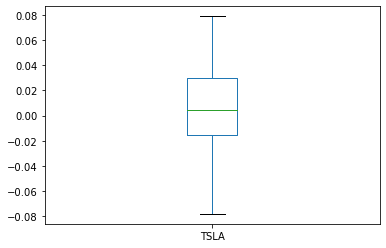



SBE

Recent Price Pct: 36.34
Mean Price Pct: 0.0011528304300192638
Price Pct std. deviation: 0.05490099029376944
The stock is more volatile than the market.


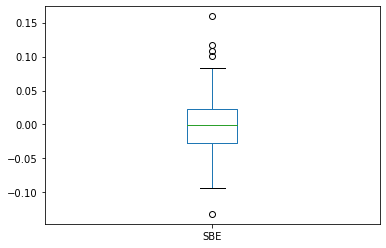



PLUG

Recent Price Pct: 55.89
Mean Price Pct: 0.01652864272460649
Price Pct std. deviation: 0.0806573464903071
The stock is more volatile than the market.


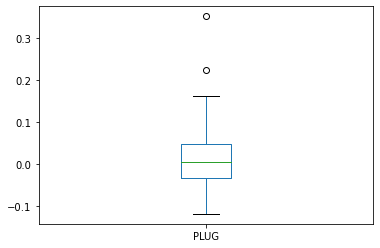



F

Recent Price Pct: 11.58
Mean Price Pct: 0.00458604950572661
Price Pct std. deviation: 0.023349614004478686
The stock is more volatile than the market.


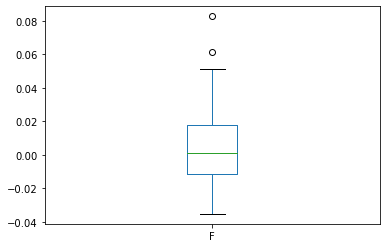



GM

Recent Price Pct: 52.58
Mean Price Pct: 0.0031146339234176734
Price Pct std. deviation: 0.027126247191454983
The stock is more volatile than the market.


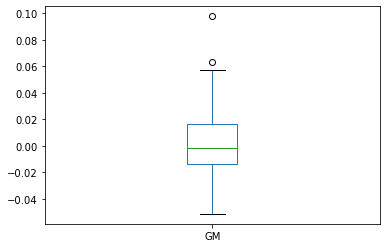



BLNK

Recent Price Pct: 46.1
Mean Price Pct: 0.01306146791842135
Price Pct std. deviation: 0.09442535673675612
The stock is more volatile than the market.


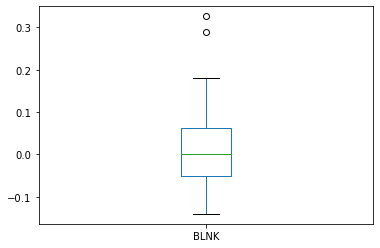



QS

Recent Price Pct: 62.25
Mean Price Pct: 0.019250593137883125
Price Pct std. deviation: 0.14050319052839952
The stock is more volatile than the market.


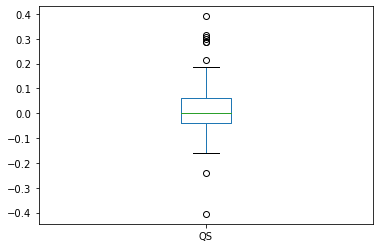



ALB

Recent Price Pct: 155.93
Mean Price Pct: 0.002761717654996786
Price Pct std. deviation: 0.03330181810771268
The stock is more volatile than the market.


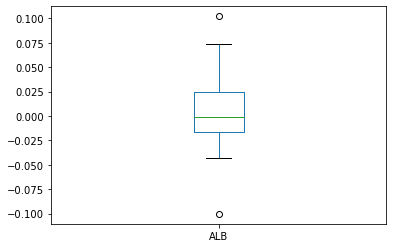

In [37]:
# Loop through the stocks in the green_auto portfolio and compare their performance
# with the sp500.
for stock_ticker in df_daily_returns_green_auto:

    # Get most recent price
    stock_recent_price = green_auto_df[stock_ticker]["close"][-1]

    # Calculate the mean price percent change
    stock_mean = calculate_mean(df_daily_returns_green_auto[stock_ticker])
    
    # Calculate the standard deviation of the percent change
    stock_std = calculate_standard_deviation(df_daily_returns_green_auto[stock_ticker])
    
    # Print the stock name and calculated statistics
    print(f"{stock_ticker}\n")
    print(f"Recent Price Pct: {stock_recent_price}")
    print(f"Mean Price Pct: {stock_mean}")
    print(f"Price Pct std. deviation: {stock_std}")
    
    # Compare the stock's volatility with the underlying market
    compare_volatility(stock_std, spy_std)

    df_daily_returns_green_auto[stock_ticker].plot.box()
    plt.show()
    print("\n")

In [28]:
#GENERATE MARKET ANALYSIS REPORT FOR GREEN_BUILDING PORTFOLIO

In [29]:
# Create df and calculate pct_change for green_building
green_building_df_closing_prices = pd.DataFrame()

# Fetch the closing prices green_building portfolio
for stock_ticker in green_building_tickers:
    green_building_df_closing_prices[stock_ticker] = green_building_df[stock_ticker]["close"]

# Drop the time component of the date
green_building_df_closing_prices.index = green_building_df_closing_prices.index.date

# Compute daily returns
df_daily_returns_green_building = green_building_df_closing_prices.pct_change().dropna()

# Display sample data
df_daily_returns_green_building.head()

,TT,AVB,ROK,AYI
2020-09-29,-0.003126,-0.027064,0.005134,-0.005710
2020-09-30,0.000495,0.013230,-0.002531,0.013467
2020-10-01,0.005525,0.041918,-0.005256,0.003127
2020-10-02,0.015829,0.015874,0.017584,0.028635
2020-10-05,0.024867,0.015499,0.043603,0.041568


TT

Recent Price Pct: 153.99
Mean Price Pct: 0.0025311909658305926
Price Pct std. deviation: 0.016879335157068142
The stock is more volatile than the market.


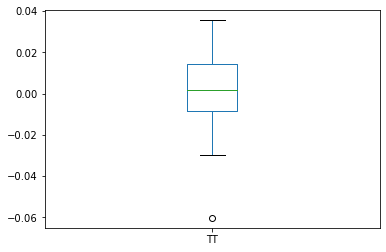



AVB

Recent Price Pct: 178.01
Mean Price Pct: 0.0018404368666210737
Price Pct std. deviation: 0.020791626682955058
The stock is more volatile than the market.


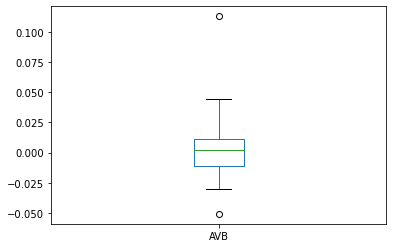



ROK

Recent Price Pct: 248.23
Mean Price Pct: 0.0013711106770168463
Price Pct std. deviation: 0.017718388255067392
The stock is more volatile than the market.


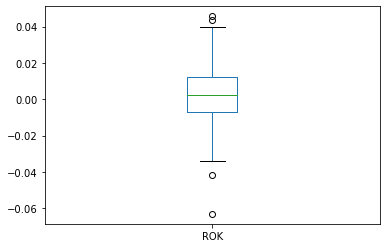



AYI

Recent Price Pct: 121.78
Mean Price Pct: 0.002209189110110544
Price Pct std. deviation: 0.02747963979047605
The stock is more volatile than the market.


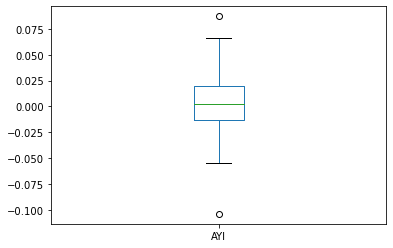

In [30]:
# Loop through the stocks in the green_building portfolio and compare their performance
# with the sp500.
for stock_ticker in df_daily_returns_green_building:

    # Get most recent price
    stock_recent_price = green_building_df[stock_ticker]["close"][-1]

    # Calculate the mean price percent change
    stock_mean = calculate_mean(df_daily_returns_green_building[stock_ticker])
    
    # Calculate the standard deviation of the percent change
    stock_std = calculate_standard_deviation(df_daily_returns_green_building[stock_ticker])
    
    # Print the stock name and calculated statistics
    print(f"{stock_ticker}\n")
    print(f"Recent Price Pct: {stock_recent_price}")
    print(f"Mean Price Pct: {stock_mean}")
    print(f"Price Pct std. deviation: {stock_std}")
    
    # Compare the stock's volatility with the underlying market
    compare_volatility(stock_std, spy_std)

    df_daily_returns_green_building[stock_ticker].plot.box()
    plt.show()
    print("\n")

In [31]:
#GENERATE MARKET ANALYSIS REPORT FOR GREEN_ENERGY PORTFOLIO

In [32]:
# Create df and calculate pct_change for green_energy
green_energy_df_closing_prices = pd.DataFrame()

# Fetch the closing prices green_energy portfolio
for stock_ticker in green_energy_tickers:
    green_energy_df_closing_prices[stock_ticker] = green_energy_df[stock_ticker]["close"]

# Drop the time component of the date
green_energy_df_closing_prices.index = green_energy_df_closing_prices.index.date

# Compute daily returns
df_daily_returns_green_energy = green_energy_df_closing_prices.pct_change().dropna()

# Display sample data
df_daily_returns_green_energy.head()

,REGI,LNG,RUN,DQ,TPIC,NEE,AGR,ETN,ORA
2020-09-29,0.068560,-0.017814,0.011533,0.005003,0.012248,-0.002959,-0.002027,-0.011526,0.011823
2020-09-30,0.067759,-0.045136,0.058654,0.035846,0.030605,-0.021160,0.024574,0.008202,0.000508
2020-10-01,0.009360,0.002374,0.038147,0.102928,0.024517,0.021040,0.015064,-0.014113,0.013033
2020-10-02,0.032826,0.013351,-0.043995,-0.002481,-0.016515,-0.006415,0.022261,0.020877,0.013534
2020-10-05,0.025319,0.011262,0.028108,0.129108,0.065456,0.024279,0.023687,0.023371,0.022255


REGI

Recent Price Pct: 96.96
Mean Price Pct: 0.008489676714532057
Price Pct std. deviation: 0.04770985258740517
The stock is more volatile than the market.


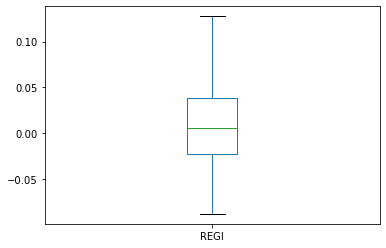



LNG

Recent Price Pct: 69.16
Mean Price Pct: 0.003638616849018939
Price Pct std. deviation: 0.021767670051947973
The stock is more volatile than the market.


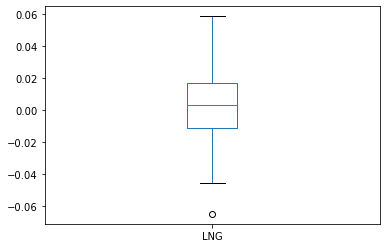



RUN

Recent Price Pct: 68.55
Mean Price Pct: 0.0004963106904777427
Price Pct std. deviation: 0.044726610479744015
The stock is more volatile than the market.


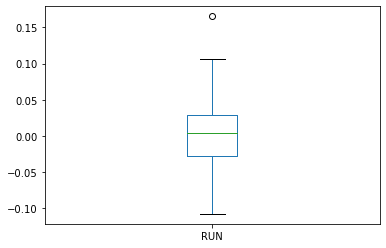



DQ

Recent Price Pct: 104.95
Mean Price Pct: 0.00835219018429906
Price Pct std. deviation: 0.10628356641672822
The stock is more volatile than the market.


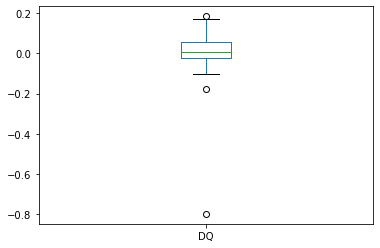



TPIC

Recent Price Pct: 70.43
Mean Price Pct: 0.01036149053878208
Price Pct std. deviation: 0.04323380484364303
The stock is more volatile than the market.


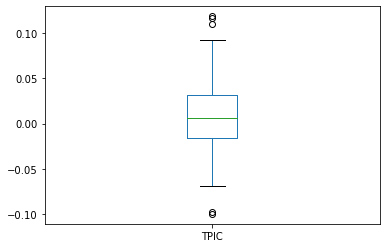



NEE

Recent Price Pct: 78.1
Mean Price Pct: -0.006497217618816326
Price Pct std. deviation: 0.0771097089090467
The stock is more volatile than the market.


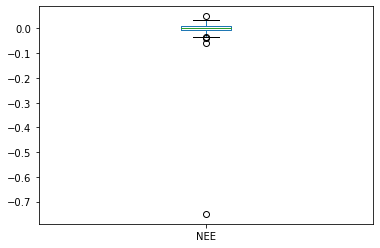



AGR

Recent Price Pct: 45.0
Mean Price Pct: -0.0008115048254188241
Price Pct std. deviation: 0.015390827320358083
The stock is more volatile than the market.


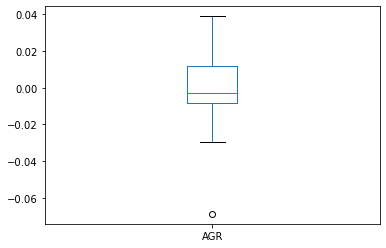



ETN

Recent Price Pct: 127.86
Mean Price Pct: 0.0023924145519536775
Price Pct std. deviation: 0.01713568284899023
The stock is more volatile than the market.


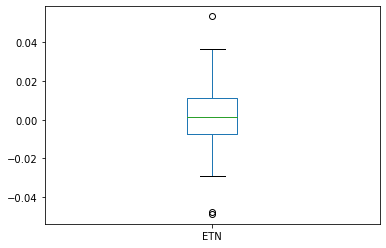



ORA

Recent Price Pct: 112.72
Mean Price Pct: 0.007156567735732467
Price Pct std. deviation: 0.03137558055417787
The stock is more volatile than the market.


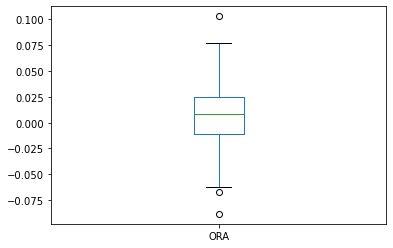

In [33]:
# Loop through the stocks in the green_energy portfolio and compare their performance
# with the sp500.
for stock_ticker in df_daily_returns_green_energy:

    # Get most recent price
    stock_recent_price = green_energy_df[stock_ticker]["close"][-1]

    # Calculate the mean price percent change
    stock_mean = calculate_mean(df_daily_returns_green_energy[stock_ticker])
    
    # Calculate the standard deviation of the percent change
    stock_std = calculate_standard_deviation(df_daily_returns_green_energy[stock_ticker])
    
    # Print the stock name and calculated statistics
    print(f"{stock_ticker}\n")
    print(f"Recent Price Pct: {stock_recent_price}")
    print(f"Mean Price Pct: {stock_mean}")
    print(f"Price Pct std. deviation: {stock_std}")
    
    # Compare the stock's volatility with the underlying market
    compare_volatility(stock_std, spy_std)

    df_daily_returns_green_energy[stock_ticker].plot.box()
    plt.show()
    print("\n")

In [34]:
#GENERATE MARKET ANALYSIS REPORT FOR GREEN_AGRICULTURE PORTFOLIO

In [35]:
# Create df and calculate pct_change for green_agriculture
green_agriculture_df_closing_prices = pd.DataFrame()

# Generate closing prices green_agriculture portfolio
for stock_ticker in green_agriculture_tickers:
    green_agriculture_df_closing_prices[stock_ticker] = green_agriculture_df[stock_ticker]["close"]

# Drop the time component of the date
green_agriculture_df_closing_prices.index = green_agriculture_df_closing_prices.index.date

# Compute daily returns
df_daily_returns_green_agriculture = green_agriculture_df_closing_prices.pct_change().dropna()

# Display data
df_daily_returns_green_agriculture.head()

,TRMB,A,CWCO,XYL
2020-09-29,0.005753,0.006630,-0.014911,-0.001312
2020-09-30,-0.006129,0.006786,-0.013245,0.004417
2020-10-01,0.004522,0.003271,-0.009588,-0.018721
2020-10-02,0.009003,-0.011954,0.015489,0.021985
2020-10-05,0.028595,0.030797,0.048618,0.023350


TRMB

Recent Price Pct: 73.0
Mean Price Pct: 0.0042930782643252575
Price Pct std. deviation: 0.019617378998161628
The stock is more volatile than the market.


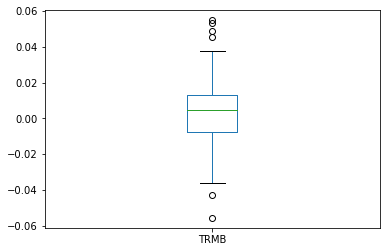



A

Recent Price Pct: 126.88
Mean Price Pct: 0.002551793825193704
Price Pct std. deviation: 0.01409185804251444
The stock is more volatile than the market.


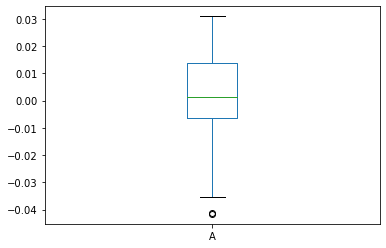



CWCO

Recent Price Pct: 13.03
Mean Price Pct: 0.0021778718871507995
Price Pct std. deviation: 0.020871930212142998
The stock is more volatile than the market.


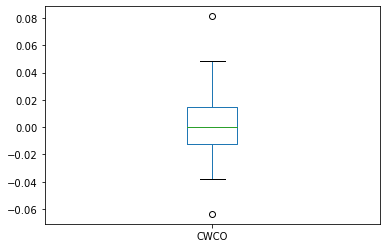



XYL

Recent Price Pct: 99.77
Mean Price Pct: 0.0018878744836418855
Price Pct std. deviation: 0.01641399813745604
The stock is more volatile than the market.


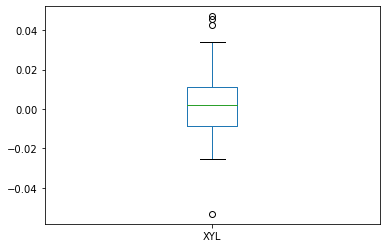

In [36]:
# Loop through the stocks in the green_agriculture portfolio and compare their performance
# with the sp500.
for stock_ticker in df_daily_returns_green_agriculture:

    # Get most recent price
    stock_recent_price = green_agriculture_df[stock_ticker]["close"][-1]

    # Calculate the mean price percent change
    stock_mean = calculate_mean(df_daily_returns_green_agriculture[stock_ticker])
    
    # Calculate the standard deviation of the percent change
    stock_std = calculate_standard_deviation(df_daily_returns_green_agriculture[stock_ticker])
    
    # Print the stock name and calculated statistics
    print(f"{stock_ticker}\n")
    print(f"Recent Price Pct: {stock_recent_price}")
    print(f"Mean Price Pct: {stock_mean}")
    print(f"Price Pct std. deviation: {stock_std}")
    
    # Compare the stock's volatility with the underlying market
    compare_volatility(stock_std, spy_std)

    df_daily_returns_green_agriculture[stock_ticker].plot.box()
    plt.show()
    print("\n")